Link Dataset : https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification

# Import Library

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Membuat Data Genarator

In [29]:
img_path = './PandasBears/'
img_datagen = ImageDataGenerator(
    rotation_range = 0.45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [30]:
img_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32
)

Found 600 images belonging to 2 classes.


In [31]:
img_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    validation_split = 0.1
)

train_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32,
    subset = 'training',
    class_mode = 'binary'
)

val_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32,
    subset = 'validation',
    class_mode = 'binary'
)

test_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 540 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 600 images belonging to 2 classes.


In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=[150, 150, 3]), #inputshape ngikuti target_size

    # hidden layer
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    # dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [34]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 10
)

Epoch 1/10
17/17 [==============================] - 22s 1s/step - loss: 1.0106 - accuracy: 0.7537 - val_loss: 0.4861 - val_accuracy: 0.8333
Epoch 2/10
17/17 [==============================] - 22s 1s/step - loss: 0.4734 - accuracy: 0.8333 - val_loss: 0.4588 - val_accuracy: 0.8333
Epoch 3/10
17/17 [==============================] - 22s 1s/step - loss: 0.4540 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.8333
Epoch 4/10
17/17 [==============================] - 20s 1s/step - loss: 0.4272 - accuracy: 0.8333 - val_loss: 0.4645 - val_accuracy: 0.8333
Epoch 5/10
17/17 [==============================] - 23s 1s/step - loss: 0.4055 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.8333
Epoch 6/10
17/17 [==============================] - 25s 1s/step - loss: 0.3815 - accuracy: 0.8333 - val_loss: 0.4440 - val_accuracy: 0.8333
Epoch 7/10
17/17 [==============================] - 23s 1s/step - loss: 0.3476 - accuracy: 0.8537 - val_loss: 0.4486 - val_accuracy: 0.8333
Epoch 8/10
17/17 [==

In [35]:
model.evaluate(val_generator)

2/2 [==============================] - 1s 296ms/step - loss: 0.5323 - accuracy: 0.8167


[0.5323447585105896, 0.8166666626930237]

Text(0, 0.5, 'loss')

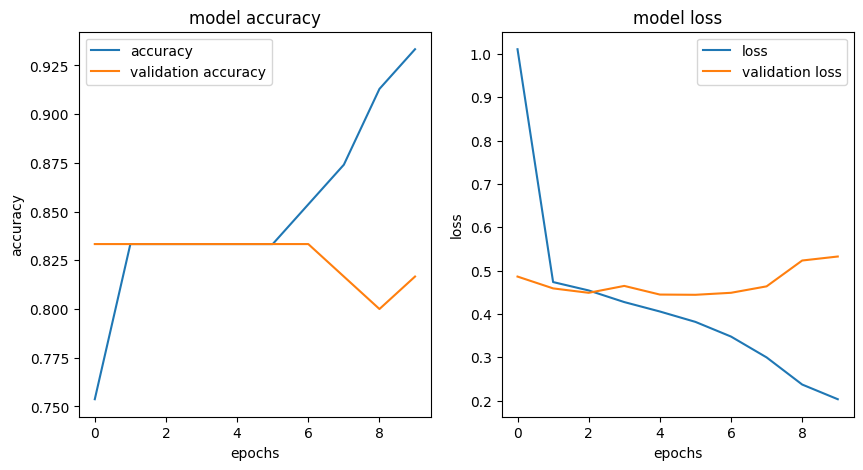

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")